<a href="https://colab.research.google.com/github/rafaelnordavind/artigo-final/blob/main/05_Artigo_auto_ts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Ref.: https://www.kaggle.com/code/caesarlupum/bitcoin-price-prediction-auto-ts/notebook

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime

import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

In [ ]:
# Baixando a base de dados do repositório do github
!mkdir dataset
!wget --no-check-certificate \
"https://raw.githubusercontent.com/rafaelnordavind/artigo-final/main/dataset/df_max_requests_10min.csv" \
-O "dataset/df_max_requests_10min.csv"

## Obtendo os dados

In [ ]:
data_df = pd.read_csv('dataset/df_max_requests_10min.csv', parse_dates=['timestamp'])
data_df['timestamp'] = pd.to_datetime(data_df['timestamp'])
data_df['timestamp'] = data_df['timestamp'].dt.tz_localize(None)
data_df.set_index('timestamp', inplace=True)

#### Time Series Decomposition & Statistical Tests

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:

plt.figure(figsize=(15,12))
series = data_df.num_requests
result = seasonal_decompose(series, model='additive',period=24*6)
#result.plot()

<Figure size 1500x1200 with 0 Axes>

In [ ]:
# Renaming the column names accroding to Prophet's requirements

daily_data_fb = data_df.reset_index()[['timestamp','num_requests']].rename({'timestamp':'ds','num_requests':'y'}, axis=1)
daily_data_fb.head()

,ds,y
0,1995-08-28 00:00:00,1493
1,1995-08-28 00:10:00,1543
2,1995-08-28 00:20:00,1265
3,1995-08-28 00:30:00,1116
4,1995-08-28 00:40:00,1567


In [ ]:
test_length = 500
split_date = "1995-09-04 01:00:00"
train_filt = daily_data_fb['ds'] <= split_date
test_filt = daily_data_fb['ds'] > split_date

train_fb = daily_data_fb[train_filt]
test_fb = daily_data_fb[test_filt]

print("train data shape :", train_fb.shape[0] / daily_data_fb.shape[0] * 100)
print("test data shape :", test_fb.shape[0] / daily_data_fb.shape[0] * 100)

train data shape : 50.34722222222222
test data shape : 49.65277777777778


![](https://github.com/AutoViML/Auto_TS/raw/master/logo.png)

[Auto_TS: Auto_TimeSeries](https://github.com/AutoViML/Auto_TS)

In [ ]:
!pip install auto-ts

In [ ]:
!pip install tscv

In [ ]:

from auto_ts import auto_timeseries as ATS

Imported auto_timeseries version:0.0.71. Call by using:
model = auto_timeseries(score_type='rmse',
        time_interval='M', non_seasonal_pdq=None, seasonality=False,
        seasonal_period=12, model_type=['best'], verbose=2, dask_xgboost_flag=0)
model.fit(traindata, ts_column,target)
model.predict(testdata, model='best')



In [ ]:
automl_model = ATS(
    score_type='rmse',
    forecast_period=test_length,
    time_interval='D',
    model_type='best',
    verbose=2,
    seasonality=True
)

In [ ]:
ts_column = 'ds'
target = 'y'
sep = ','

Start of Fit.....
    Target variable given as = y
Start of loading of data.....
    Inputs: ts_column = ds, sep = ,, target = ['y']
    Using given input: pandas dataframe...
    ds column exists in given train data...
    train data shape = (1015, 1)
Alert: Could not detect strf_time_format of ds. Provide strf_time format during "setup" for better results.

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Data is already stationary
There is no differencing needed in this datasets for VAR model


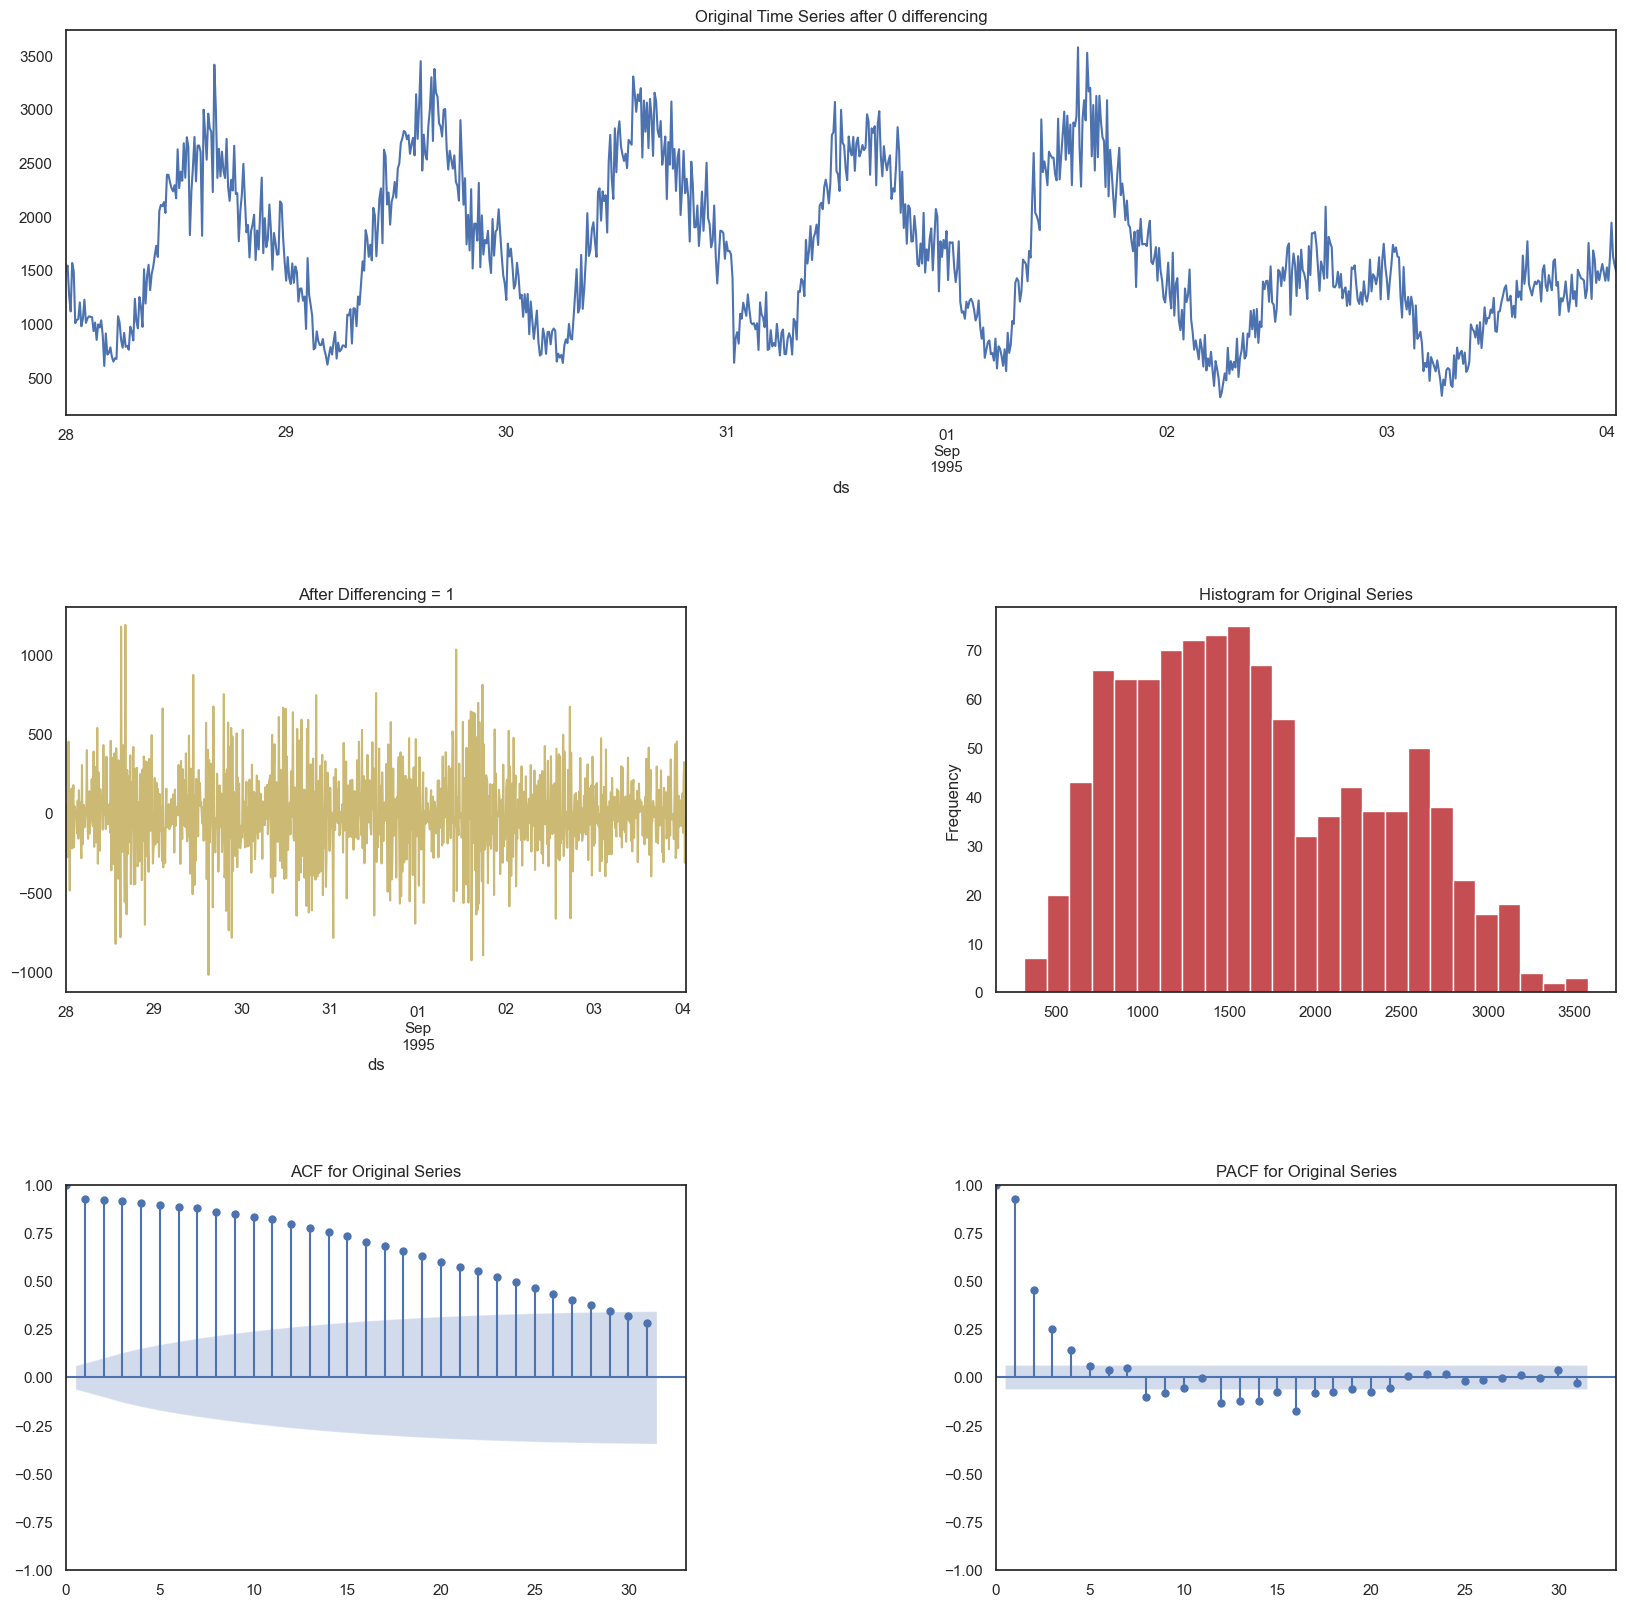

Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...


03:36:59 - cmdstanpy - INFO - Chain [1] start processing


kwargs for Prophet model: {'iter': 100}
    Fit-Predict data (shape=(1015, 2)) with Confidence Interval = 0.95...
  Starting Prophet Fit
       Adding daily seasonality to Prophet with period=12, fourier_order=15 and prior_scale=0.10
  Starting Prophet Cross Validation
Lowering forecast period to 169 to enable cross_validation
Max. iterations using expanding window cross validation = 5

Fold Number: 1 --> Train Shape: 170 Test Shape: 169


03:36:59 - cmdstanpy - INFO - Chain [1] done processing
03:36:59 - cmdstanpy - INFO - Chain [1] start processing
03:36:59 - cmdstanpy - INFO - Chain [1] done processing


    RMSE = 320,753.85
    Std Deviation of actuals = 757.69
    Normalized RMSE (as pct of std dev) = 42333%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 339 Test Shape: 169


03:36:59 - cmdstanpy - INFO - Chain [1] start processing
03:36:59 - cmdstanpy - INFO - Chain [1] done processing


    RMSE = 7,196.80
    Std Deviation of actuals = 720.48
    Normalized RMSE (as pct of std dev) = 999%
Cross Validation window: 2 completed

Fold Number: 3 --> Train Shape: 508 Test Shape: 169


03:37:00 - cmdstanpy - INFO - Chain [1] start processing
03:37:00 - cmdstanpy - INFO - Chain [1] done processing


    RMSE = 1,101.20
    Std Deviation of actuals = 740.13
    Normalized RMSE (as pct of std dev) = 149%
Cross Validation window: 3 completed

Fold Number: 4 --> Train Shape: 677 Test Shape: 169


03:37:00 - cmdstanpy - INFO - Chain [1] start processing
03:37:00 - cmdstanpy - INFO - Chain [1] done processing


    RMSE = 10,196.50
    Std Deviation of actuals = 542.72
    Normalized RMSE (as pct of std dev) = 1879%
Cross Validation window: 4 completed

Fold Number: 5 --> Train Shape: 846 Test Shape: 169
    RMSE = 84,941.50
    Std Deviation of actuals = 351.56
    Normalized RMSE (as pct of std dev) = 24161%
Cross Validation window: 5 completed

-------------------------------------------
Model Cross Validation Results:
-------------------------------------------
    MAE (Mean Absolute Error = 73721.74
    MSE (Mean Squared Error = 22051013163.12
    MAPE (Mean Absolute Percent Error) = 5814%
    RMSE (Root Mean Squared Error) = 148495.8355
    Normalized RMSE (MinMax) = 4554%
    Normalized RMSE (as Std Dev of Actuals)= 20753%
Time Taken = 2 seconds


03:37:01 - cmdstanpy - INFO - Chain [1] start processing
03:37:01 - cmdstanpy - INFO - Chain [1] done processing


  End of Prophet Fit


Building Auto SARIMAX Model



Running Auto SARIMAX Model...


Best Parameters:
p: None, d: None, q: None
P: None, D: None, Q: None
Seasonality: True
Seasonal Period: 12
Lowering forecast period to 169 to enable cross_validation

Fold Number: 1 --> Train Shape: 170 Test Shape: 169

    Finding the best parameters using AutoArima:
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2398.622, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2367.386, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2342.457, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2396.660, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2340.713, Time=0.06 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2342.411, Time=0.12 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2343.993, Time=0.23 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2342.469, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=2342.332, Time=0.06 sec

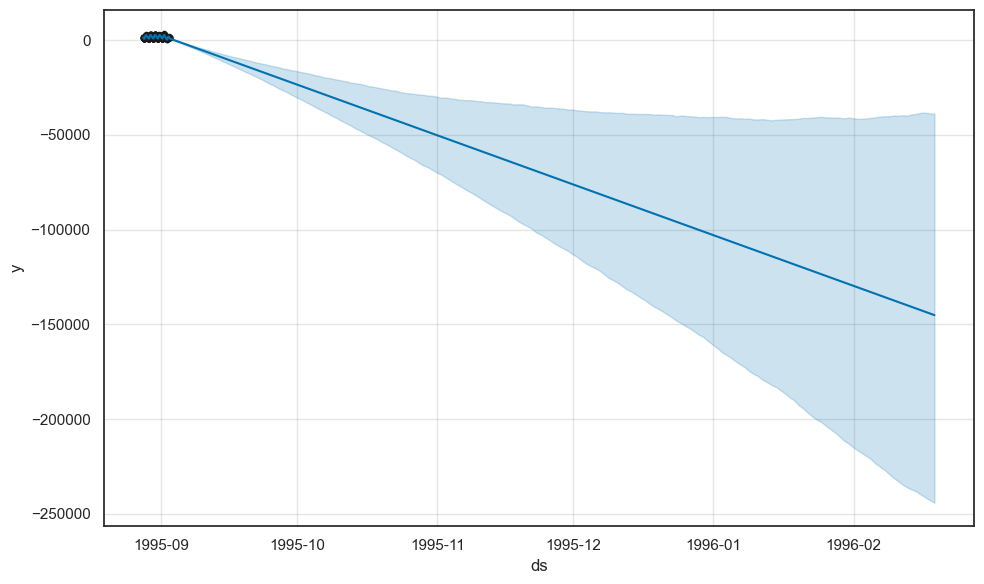

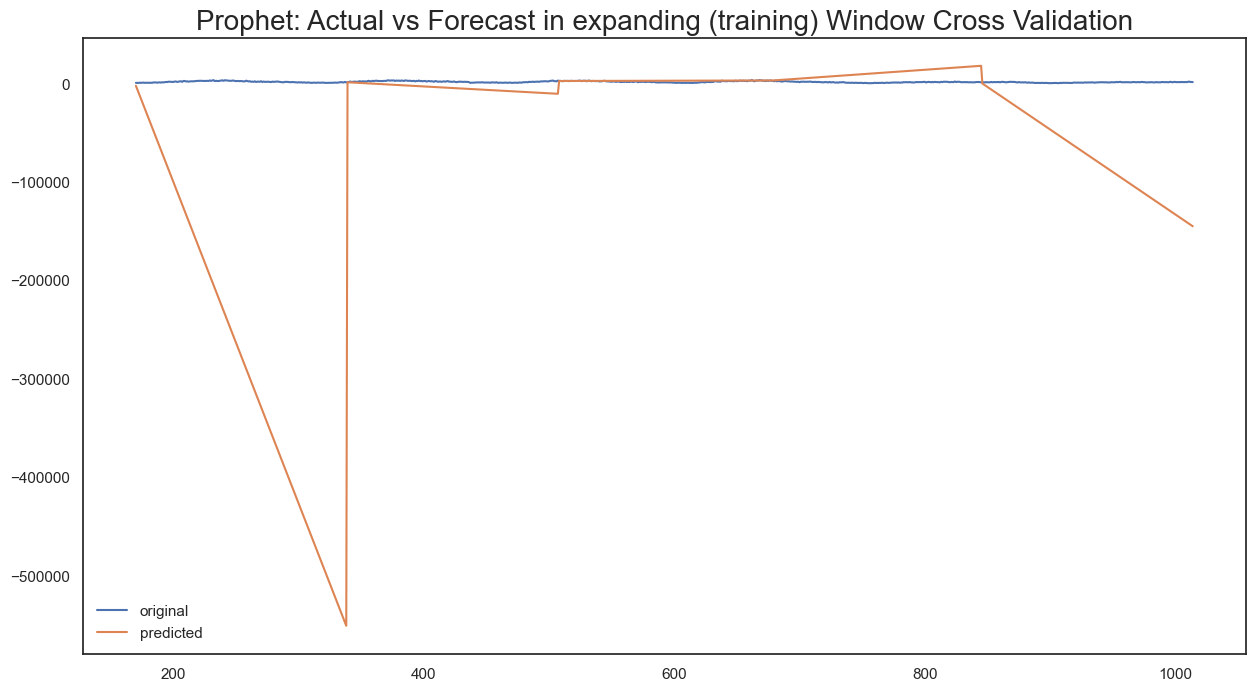

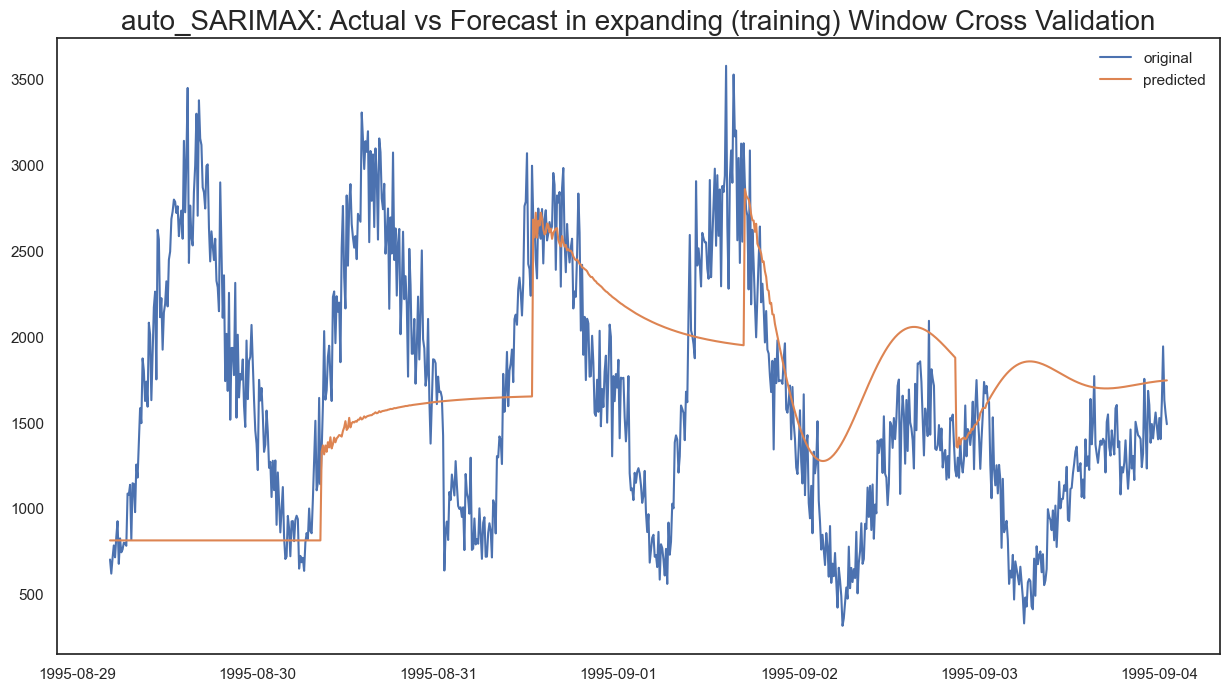

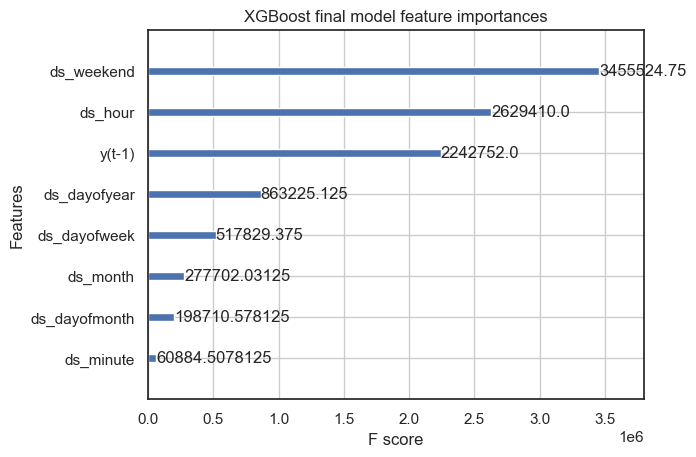

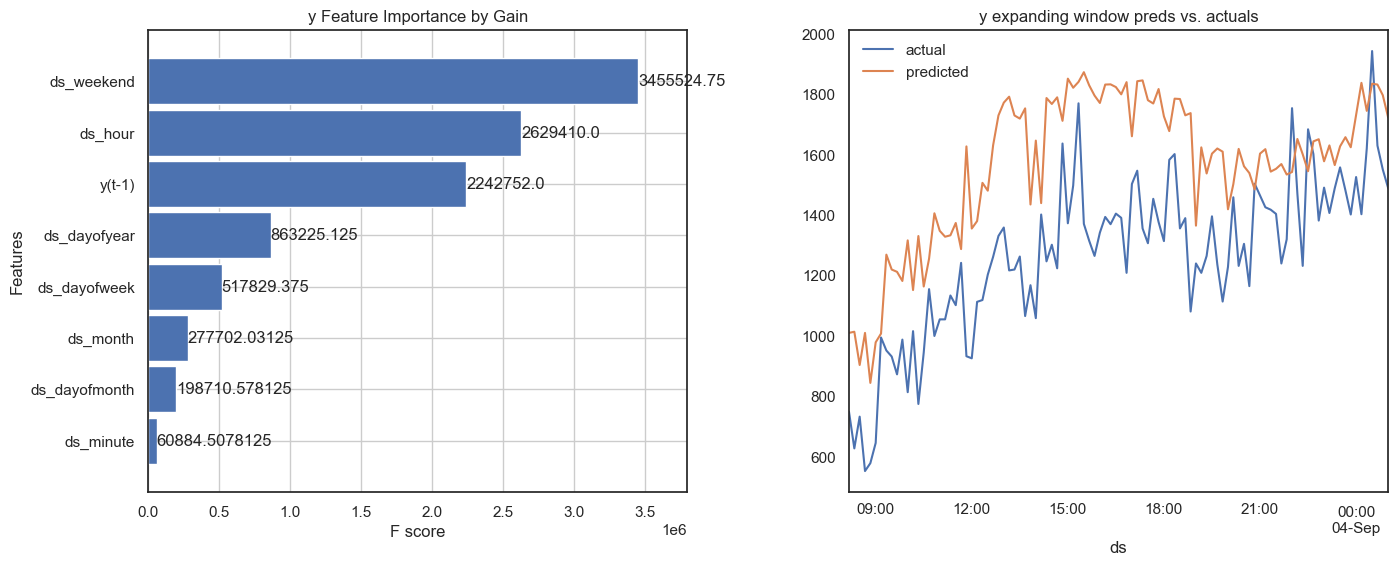

In [ ]:
automl_model.fit(
    traindata=train_fb,
    ts_column=ts_column,
    target=target,
    cv=5,
    sep=','
    )

### Evaluate Results

In [ ]:
automl_model.get_leaderboard()

,name,rmse
2,ML,350.101366
1,auto_SARIMAX,801.851493
0,Prophet,84837.970566


<AxesSubplot:xlabel='Model', ylabel='CV Scores'>

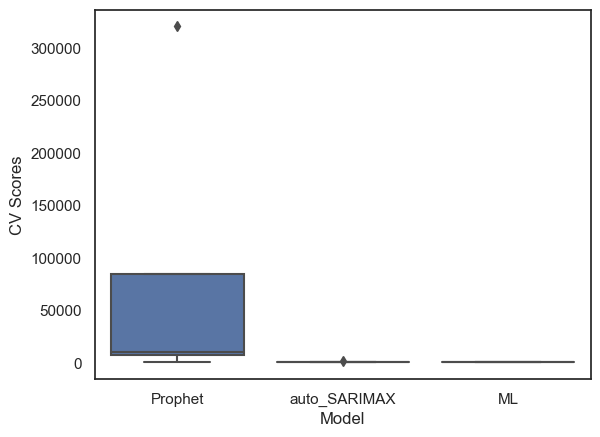

In [ ]:

automl_model.plot_cv_scores()

In [ ]:
# There is a Bug with Prophet folds: https://github.com/AutoViML/Auto_TS/issues/25
automl_model.get_cv_scores()

,Model,CV Scores
0,Prophet,320753.849333
1,Prophet,7196.802873
2,Prophet,1101.197193
3,Prophet,10196.501815
4,Prophet,84941.501619
5,auto_SARIMAX,1184.781231
6,auto_SARIMAX,828.940958
7,auto_SARIMAX,752.007276
8,auto_SARIMAX,558.442061
9,auto_SARIMAX,685.085938


In [ ]:
results_dict = automl_model.get_ml_dict()
results_dict['Prophet']['forecast']

array([-2.29538043e+03, -5.56251422e+03, -8.82964800e+03, -1.20967818e+04,
       -1.53639156e+04, -1.86310494e+04, -2.18981831e+04, -2.51653169e+04,
       -2.84324507e+04, -3.16995845e+04, -3.49667183e+04, -3.82338521e+04,
       -4.15009858e+04, -4.47681196e+04, -4.80352534e+04, -5.13023872e+04,
       -5.45695210e+04, -5.78366548e+04, -6.11037885e+04, -6.43709223e+04,
       -6.76380561e+04, -7.09051899e+04, -7.41723237e+04, -7.74394575e+04,
       -8.07065912e+04, -8.39737250e+04, -8.72408588e+04, -9.05079926e+04,
       -9.37751264e+04, -9.70422602e+04, -1.00309394e+05, -1.03576528e+05,
       -1.06843662e+05, -1.10110795e+05, -1.13377929e+05, -1.16645063e+05,
       -1.19912197e+05, -1.23179330e+05, -1.26446464e+05, -1.29713598e+05,
       -1.32980732e+05, -1.36247866e+05, -1.39514999e+05, -1.42782133e+05,
       -1.46049267e+05, -1.49316401e+05, -1.52583534e+05, -1.55850668e+05,
       -1.59117802e+05, -1.62384936e+05, -1.65652070e+05, -1.68919203e+05,
       -1.72186337e+05, -